# Notebook demonstrating the use of the pubmetric package

## Imports and installation

You can install the packages needed using the following command `pip install -r setup.py`.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sys
from datetime import datetime
import igraph              
import py4cytoscape as p4c # note that Cytoscape has to be installed and open on your machine for visualisation to work
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), 'src')))

import json

import asyncio
import nest_asyncio
nest_asyncio.apply() # Necessary for asyncio notebook compatibility

from pubmetric.network import create_network 
from pubmetric.workflow import *
from pubmetric.metrics import *
import pubmetric.pckg_dev as dev

## Graph generation

For FastAPI compatibility the main function of the PubMetric package (create_citation_network) needs to be executed within asyncio.run().

### Load data

In [2]:
path_to_data = 'out_202407041439' 

loaded_graph = asyncio.run(create_network(inpath=path_to_data, load_graph=True)) # TODO: if no data then make data or ask if make data?


2024-08-14 13:44:35 - Loading graph from out_202407041439/graph.pkl.
2024-08-14 13:44:35 - Graph loaded from out_202407041439/graph.pkl.
2024-08-14 13:44:35 - Complete data download and graph creation took 0:00:00.030047


### Generate new graph


#### Test size

For example with a smaller testsize 

In [ ]:
testsize_graph = asyncio.run(create_network(load_graph=False, test_size=20))#, inpath='tests/data'))
print(testsize_graph.vs['age'])

#### Full network

Or the entire bio.tools database proteomics topic (default), or another specified topic:

In [3]:
full_proteomics_graph = asyncio.run(create_network(topic_id="topic_0121", inpath="out/out_20240814134857")) # this is the default value for topic id, Im writing it for clearity

2024-08-14 14:25:10 - Output directory created at out/out_20240814142510.
2024-08-14 14:25:10 - Downloading tool metadata from bio.tools
2024-08-14 14:25:10 - Saving metadata file to out/out_20240814142510/tool_metadata.json.
2024-08-14 14:25:10 - Fetching and saving metadata took 0:00:00.020661
2024-08-14 14:25:10 - Downloading citations.


Fetching Citations:   0%|          | 0/1000 [00:00<?, ?article/s]

Processing citations: 100%|██████████| 1527/1527 [00:00<00:00, 7875.62tool/s]


2024-08-14 14:32:02 - Number of citations removed due to exceeding threshold 20 or referencing only one paper: 78520
2024-08-14 14:32:02 - Downloading citations took 0:06:51.473769
2024-08-14 14:32:02 - Creating co-citation graph.
2024-08-14 14:32:02 - Processing 21675 citations using 10 chunks with 2 parallel process(es) each.


Processing chunks: 100%|██████████| 10/10 [00:00<00:00, 22.96it/s]


2024-08-14 14:32:02 - Creating co-citation graph took 0:00:00.509383
2024-08-14 14:32:02 - Adding graph attributes.
2024-08-14 14:32:02 - Adding graph attributes took 0:00:00.059354
2024-08-14 14:32:02 - Saving graph.
2024-08-14 14:32:02 - Graph creation complete. Graph contains 1120 vertices and 16837 edges.
2024-08-14 14:32:02 - Complete data download and graph creation took 0:06:52.070400


In [4]:
full_metabolomics_graph = asyncio.run(create_network(topic_id="topic_3172")) 

2024-08-14 14:32:03 - Output directory created at out/out_20240814143203.
2024-08-14 14:32:03 - Downloading tool metadata from bio.tools
2024-08-14 14:32:08 - Primary publications count: 528, missing publication count: 25
2024-08-14 14:32:08 - Downloading pmids took 0:00:05.903133
2024-08-14 14:32:08 - Creating a new doi-pmid library


2024-08-14 14:33:37 - Found 98 tools with PMIDs using their DOIs
2024-08-14 14:33:37 - Downloading pmids from doi's took 0:01:28.383550
2024-08-14 14:33:38 - Nr of tools for which publication date could not be found: 0
2024-08-14 14:33:38 - Downloading publication dates took 0:00:01.026383
2024-08-14 14:33:38 - Found 585 out of a total of 695 tools with PMIDS.
2024-08-14 14:33:38 - Saving metadata file to out/out_20240814143203/tool_metadata.json.
2024-08-14 14:33:38 - Fetching and saving metadata took 0:01:35.319772
2024-08-14 14:33:38 - Downloading citations.


Processing citations: 100%|██████████| 585/585 [00:00<00:00, 4737.79tool/s]

2024-08-14 14:35:57 - Number of citations removed due to exceeding threshold 20 or referencing only one paper: 19844
2024-08-14 14:35:57 - Downloading citations took 0:02:19.309978
2024-08-14 14:35:57 - Creating co-citation graph.
2024-08-14 14:35:57 - Creating co-citation graph took 0:00:00.011224
2024-08-14 14:35:57 - Adding graph attributes.
2024-08-14 14:35:57 - Adding graph attributes took 0:00:00.009670
2024-08-14 14:35:57 - Saving graph.
2024-08-14 14:35:57 - Graph creation complete. Graph contains 401 vertices and 4695 edges.
2024-08-14 14:35:57 - Complete data download and graph creation took 0:03:54.653030


Genomics topic is the same as runing on the full database, but that is too heavy, so we add tool_selection='full' which indicates we want all well annotated tools in bio.tools

In [5]:
full_genomics_graph = asyncio.run(create_network(topic_id=None, inpath='out_20240809144325', tool_selection='full') ) 

2024-08-14 15:18:28 - Output directory created at out/out_20240814151828.
2024-08-14 15:18:28 - Downloading tool metadata from bio.tools
2024-08-14 15:18:29 - Selecting specified subsection of tools
2024-08-14 15:18:29 - Number of selected tools: 1538
2024-08-14 15:18:29 - Saving metadata file to out/out_20240814151828/tool_metadata.json.
2024-08-14 15:18:29 - Fetching and saving metadata took 0:00:00.658929
2024-08-14 15:18:29 - Downloading citations.


Processing citations: 100%|██████████| 1538/1538 [00:01<00:00, 928.67tool/s] 


2024-08-14 16:06:40 - Number of citations removed due to exceeding threshold 20 or referencing only one paper: 200930
2024-08-14 16:06:40 - Downloading citations took 0:48:11.406454
2024-08-14 16:06:40 - Creating co-citation graph.
2024-08-14 16:06:40 - Processing 235892 citations using 10 chunks with 2 parallel process(es) each.


Processing chunks: 100%|██████████| 10/10 [00:01<00:00,  6.72it/s]


2024-08-14 16:06:42 - Creating co-citation graph took 0:00:02.110106
2024-08-14 16:06:42 - Adding graph attributes.
2024-08-14 16:06:42 - Adding graph attributes took 0:00:00.057262
2024-08-14 16:06:42 - Saving graph.
2024-08-14 16:06:42 - Graph creation complete. Graph contains 1005 vertices and 28952 edges.
2024-08-14 16:06:42 - Complete data download and graph creation took 0:48:14.245756


Moving on, choose what graph you want to work with and let's check what attributes the co-citation graph has, and that the it was correctly generated

In [ ]:
graph = full_proteomics_graph 

In [14]:
print("Graph-level attributes:", graph.vs.attributes())
print("Edge-level attributes:", graph.es.attributes())
print(f"Max edge weight is {max(list(graph.es['weight']))}, min edge weight is {min(graph.es['weight'])}")

Graph-level attributes: ['name', 'pmid', 'age', 'nr_citations']
Edge-level attributes: ['weight', 'inverted_weight']
Max edge weight is 1922, min edge weight is 1


In [15]:
degrees = [vs.degree() for vs in graph.vs]
weigths_edges = graph.es['weight']

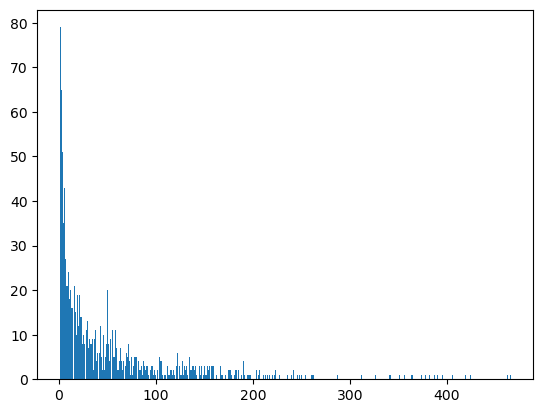

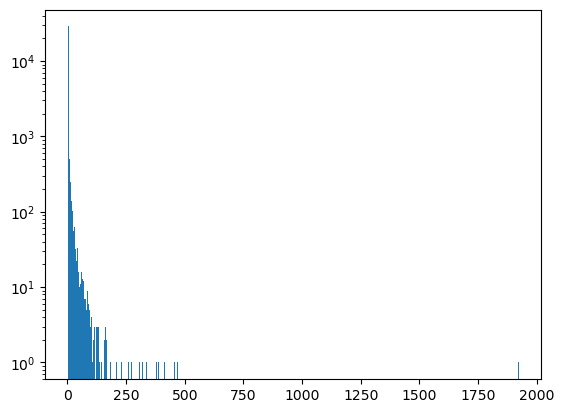

In [16]:
plt.hist(degrees, bins=500
         )
plt.show()
plt.hist(weigths_edges, bins=500
         )
plt.yscale('log')
plt.show()

In [ ]:
print("median weight:",  np.median(list(graph.es['weight'])))
print("mean weight:",np.mean(list(graph.es['weight'])))

median weight: 1.0
mean weight: 4.582077307589575


## The metric

### Download workflow data


Load the latest bio.tools metadata file and test that loading one workflow works

In [4]:
cwl_file_path = "./workflows/workflomics/candidate_workflow_23.cwl" # loading one of the APE generated workflows 
metadate_file_path = 'out_202407041439/tool_metadata.json'
workflow = parse_cwl(cwl_file_path, metadate_file_path)

Displaying the workflow which will be in the (TODO: reference workflow schema) workflow schema. Note that json format changes the tuples to lists, but in the original variable workflow "edges" is still a list of tuples

In [8]:
print(json.dumps(workflow, indent=4)) # 

{
    "edges": [
        [
            "XTandem_01",
            "ProteinProphet_02"
        ],
        [
            "ProteinProphet_02",
            "StPeter_04"
        ],
        [
            "XTandem_03",
            "StPeter_04"
        ]
    ],
    "steps": {
        "ProteinProphet_02": "14632076",
        "StPeter_04": "29400476",
        "XTandem_01": "14976030",
        "XTandem_03": "14976030"
    },
    "pmid_edges": [
        [
            "14976030",
            "14632076"
        ],
        [
            "14632076",
            "29400476"
        ],
        [
            "14976030",
            "29400476"
        ]
    ]
}


In [9]:
random_workflow = dev.generate_random_workflow(loaded_graph.vs['pmid'], workflow, random_seed = 42)

In [10]:
print(json.dumps(random_workflow, indent=4)) 

[
    [
        "38384861",
        "32897718"
    ],
    [
        "32897718",
        "28783153"
    ],
    [
        "38384861",
        "28783153"
    ]
]


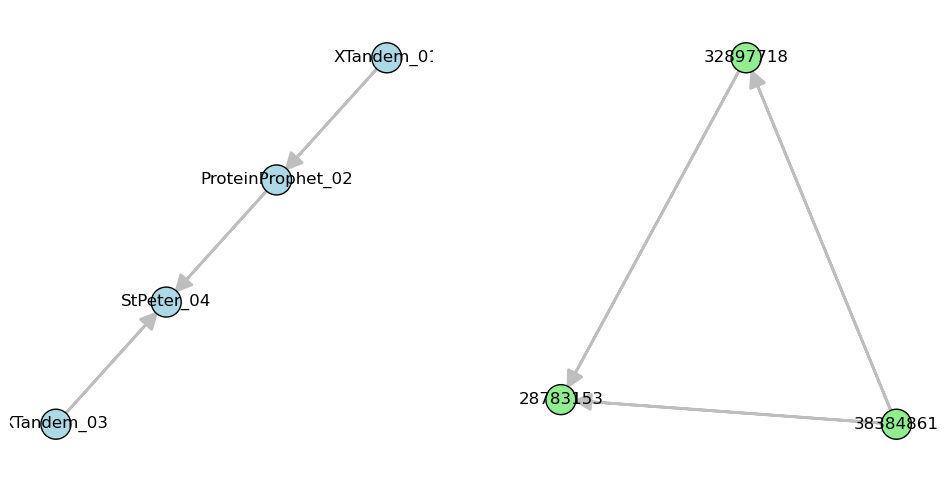

In [15]:
workflow_graph = igraph.Graph.TupleList(edges= workflow['edges'], directed=True)
random_workflow_graph = igraph.Graph.TupleList(edges=random_workflow, directed=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
igraph.plot(workflow_graph, target=ax1, layout=workflow_graph.layout("kk"), vertex_label=workflow_graph.vs["name"], 
        vertex_color='lightblue', edge_color='gray', vertex_size=30, bbox=(300, 300))
igraph.plot(random_workflow_graph, target=ax2, layout=random_workflow_graph.layout("kk"), vertex_label=random_workflow_graph.vs["name"], 
        vertex_color='lightgreen', edge_color='gray', vertex_size=30, bbox=(300, 300))
plt.show()


We can also show the importance of maintaining the hierchy of the workflow, especially in the case of tool repetitions, to be sure we preserve the context for each tool within the workflow. To do this we plot the workflow where repetitions are not taken into account as well as the workflow where they are.

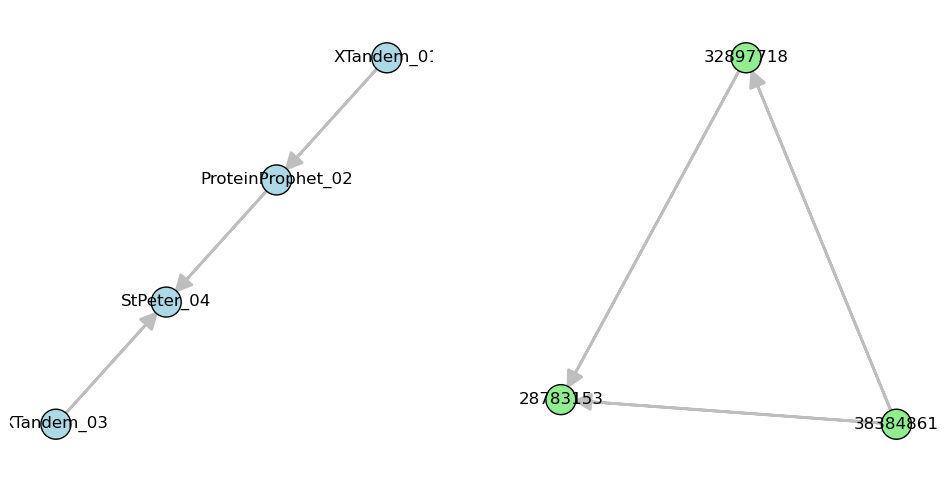

In [16]:

no_repetition_workflow_graph = igraph.Graph.TupleList(edges=workflow['pmid_edges'], directed=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
igraph.plot(workflow_graph, target=ax1, layout=workflow_graph.layout("kk"), vertex_label=workflow_graph.vs["name"], 
        vertex_color='lightblue', edge_color='gray', vertex_size=30, bbox=(300, 300))

igraph.plot(no_repetition_workflow_graph, target=ax2, layout=no_repetition_workflow_graph.layout("kk"), vertex_label=no_repetition_workflow_graph.vs["name"], 
        vertex_color='lightgreen', edge_color='gray', vertex_size=30, bbox=(300, 300))
plt.show()


### Calculate metric

Test that calculating a tool level metric for one workflow works

In [17]:
# For the metric based on the average fo the edges within the workflow we dont need to take into account the structure, so we just give the metric the pmid edges
metric_score = workflow_average_sum(loaded_graph, workflow['pmid_edges'])
random_metric_score = workflow_average_sum(loaded_graph, random_workflow)
print(f"The score for the Workflomics generated workflow is {metric_score}")
print(f"The score for the randomly generated workflow with the same structure is {random_metric_score}")


The score for the Workflomics generated workflow is 94.667
The score for the randomly generated workflow with the same structure is 0.0


## Visualisation


Using cytoscape to visualise the network, but as we have seen the vast majority are low degree vertices lets first remove the low degree vertices to make it less computationally heavy 

In [23]:
vertices_to_remove = [v.index for v in loaded_graph.vs if v.degree() < 20]
loaded_graph_small = loaded_graph.copy()
loaded_graph_small.delete_vertices(vertices_to_remove)

original_vertices = len(loaded_graph.vs)
original_edges = len(loaded_graph.es)
new_vertices = len(loaded_graph_small.vs)
new_edges = len(loaded_graph_small.es)

vertex_decrease_percentage = ((original_vertices - new_vertices) / original_vertices) * 100
edge_decrease_percentage = ((original_edges - new_edges) / original_edges) * 100

print(f"Original graph had {original_vertices} vertices and {original_edges} edges, "
      f"the smaller graph has {new_vertices} vertices and {new_edges} edges.")
print(f"Percentage decrease in vertices: {vertex_decrease_percentage:.2f}%")
print(f"Percentage decrease in edges: {edge_decrease_percentage:.2f}%")

Original graph had 1219 vertices and 52414 edges, the smaller graph has 747 vertices and 49447 edges.
Percentage decrease in vertices: 38.72%
Percentage decrease in edges: 5.66%


In [24]:
current_time = datetime.now().strftime("%Y%m%d%H%M")

p4c.create_network_from_igraph(loaded_graph_small, f"Cocitations_{current_time}", collection="Citation networks")


Applying default style...
Applying preferred layout


128

Lets visualise the two workflows in the graph

In [25]:
print("Styling graph")
p4c.set_node_shape_default("ELLIPSE")
p4c.set_node_width_default(30)
p4c.set_node_height_default(30)
p4c.set_node_border_color_default("#000000")  # Black color in hexadecimal
p4c.set_node_border_width_default(1)


Styling graph
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.
style_name not specified, so updating "default" style.


''

In [28]:
# # Styling edges this is too intense
# p4c.set_edge_label_mapping('weight')
# p4c.set_edge_line_width_mapping(**p4c.gen_edge_width_map('weight', mapping_type='c'))

Showing an image of the graph if you dont have cytoscape

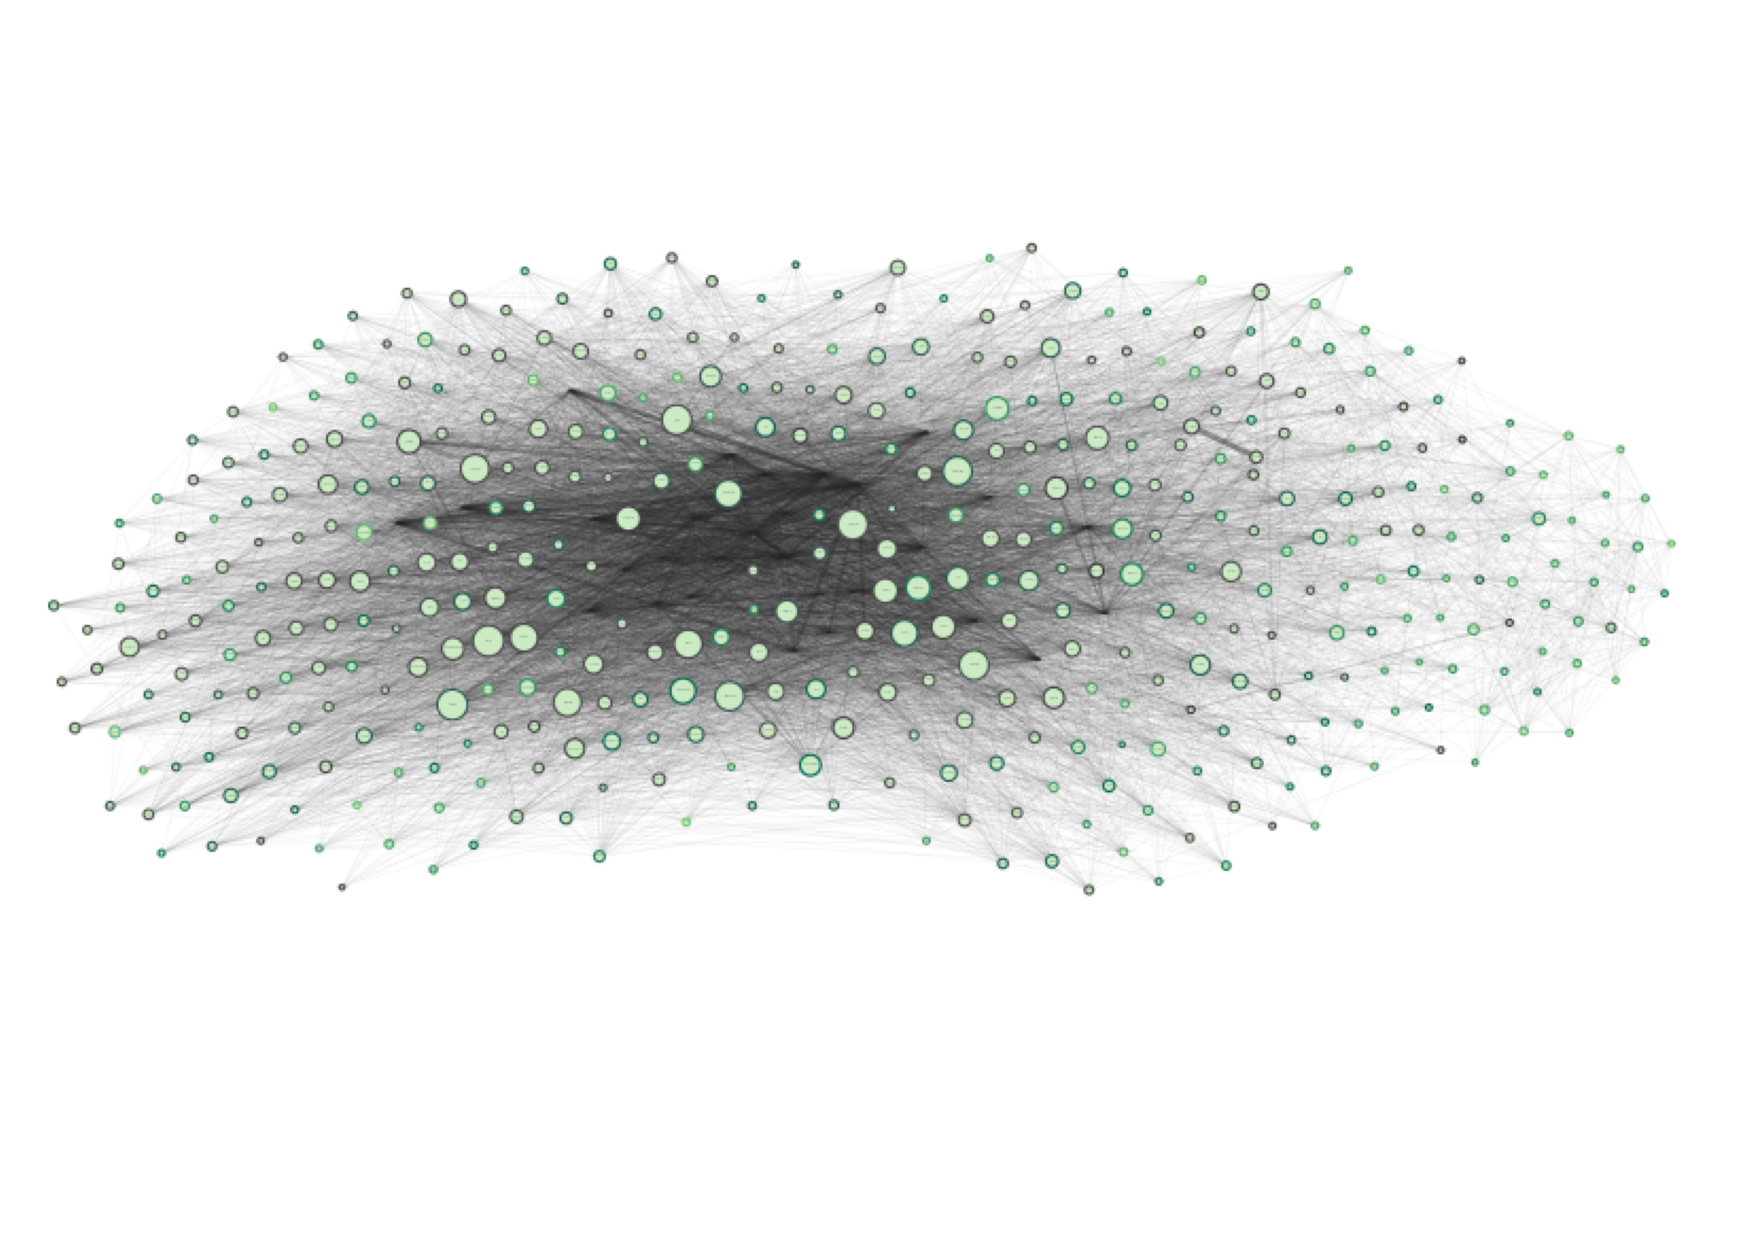

In [6]:
img = mpimg.imread('Proteomics_cocitation_graph_20240814.png')
plt.figure(figsize=(24, 16))
plt.imshow(img)
plt.axis('off')  
plt.show()
